# Microdust Project Analysis & Prediction

#### The project is consisted of two parts: Correlation studies and Prediction
#### At first, I went through the EDA to find the insight that could have possible helped for Microdust Level Prediction.  Through the EDA, I also tried to verify some of the public beliefs regarding of the microdust, such as, the belief that srping and fall are the worst seasons for microdust.
#### Secondly, I made a prediction for microdust level. The regression model using today's information and predict today's dust level will be useless; we can just check the actual data with sensors. We want to know the level of microdust, for instance, after two days, since then we can schedule the outdoor activities accordingly. 

<img src = "https://gdb.voanews.com/8B1E8887-0929-411B-9317-E0BE2F882F07_cx0_cy2_cw0_w1023_r1_s.jpg">

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from datetime import datetime
from datetime import timedelta
%matplotlib inline

#### Importing the preprocessed DataFrame. These DataFrame files are also in the repository.

In [90]:
train_set = pickle.load(open('train_set_template.p', 'rb'))
test_set =  pickle.load(open('test_set_template.p', 'rb'))

#### Reorganizing the DataFrames

In [91]:
train_set = train_set[['date_time', 'year', 'month', 'day', 'hour', 'temp', 'rain_amt', 'windspeed', 
                        'wind_direction', 'humidity', 'vapor_pressure', 'snow_amt', 'snow_3hrs', 'cloud_amt', 
                        'mid_cloud_amt', 'cloud_height', 'visibility','surface_temp', 'soil_temp(5cm)', 
                        'soil_temp(10cm)', 'soil_temp(20cm)', 'soil_temp(30cm)', 'CO', 'NO2', 'O3', 'PM10', 'SO2',
                        'Value_Beijing', 'Value_Shanghai', 'Value_Shenyang', 'PM25']]
train_set_label = train_set['PM25']

test_set = test_set[['date_time', 'year', 'month', 'day', 'hour', 'temp', 'rain_amt', 'windspeed', 
                        'wind_direction', 'humidity', 'vapor_pressure', 'snow_amt', 'snow_3hrs', 'cloud_amt', 
                        'mid_cloud_amt', 'cloud_height', 'visibility','surface_temp', 'soil_temp(5cm)', 
                        'soil_temp(10cm)', 'soil_temp(20cm)', 'soil_temp(30cm)', 'CO', 'NO2', 'O3', 'PM10', 'SO2',
                        'Value_Beijing', 'Value_Shanghai', 'Value_Shenyang', 'PM25']]
test_set_label = train_set['PM25']

In [92]:
train_set.reset_index(drop = True, inplace = True)
test_set.reset_index(drop = True, inplace = True)
train_set_label.reset_index(drop = True, inplace = True)
test_set_label.reset_index(drop = True, inplace = True)

### Variables Explanation:
* PM10 and PM25 are the Microdust levels. 
* Although it's written as PM25 for easier notation, it is actually PM2.5, which stands for microdust with 2.5 micrometer or smaller. 
* Value_Beijing, Value_Shanghai, and Value Shenyang are PM2.5 values of these major cities in China
* Both train_set and test_set have the actual values measured on the day of "date_time"
* fc_train, and fc_test, on the other hand, have 'Forecasts' values for + 2 days

# Looking at the correlations with PM25 for each variable

In [93]:
train_set.head(3)

,date_time,year,month,day,hour,temp,rain_amt,windspeed,wind_direction,humidity,...,soil_temp(30cm),CO,NO2,O3,PM10,SO2,Value_Beijing,Value_Shanghai,Value_Shenyang,PM25
0,2015-01-01 00:00:00,2015,1,1,0,-6.9,0.0,6.1,290.0,31.0,...,0.7,0.2,0.010,0.020,51.0,0.005,22.0,32.0,37.0,3.0
1,2015-01-01 01:00:00,2015,1,1,1,-7.4,0.0,4.7,290.0,33.0,...,0.8,0.2,0.009,0.020,57.0,0.004,9.0,40.0,26.0,0.0
2,2015-01-01 02:00:00,2015,1,1,2,-8.0,0.0,4.5,290.0,35.0,...,0.7,0.2,0.008,0.019,70.0,0.005,9.0,37.0,30.0,3.0


#### The easiest and the quickest way to grasp the idea of correlation is looking at the HEAT MAP

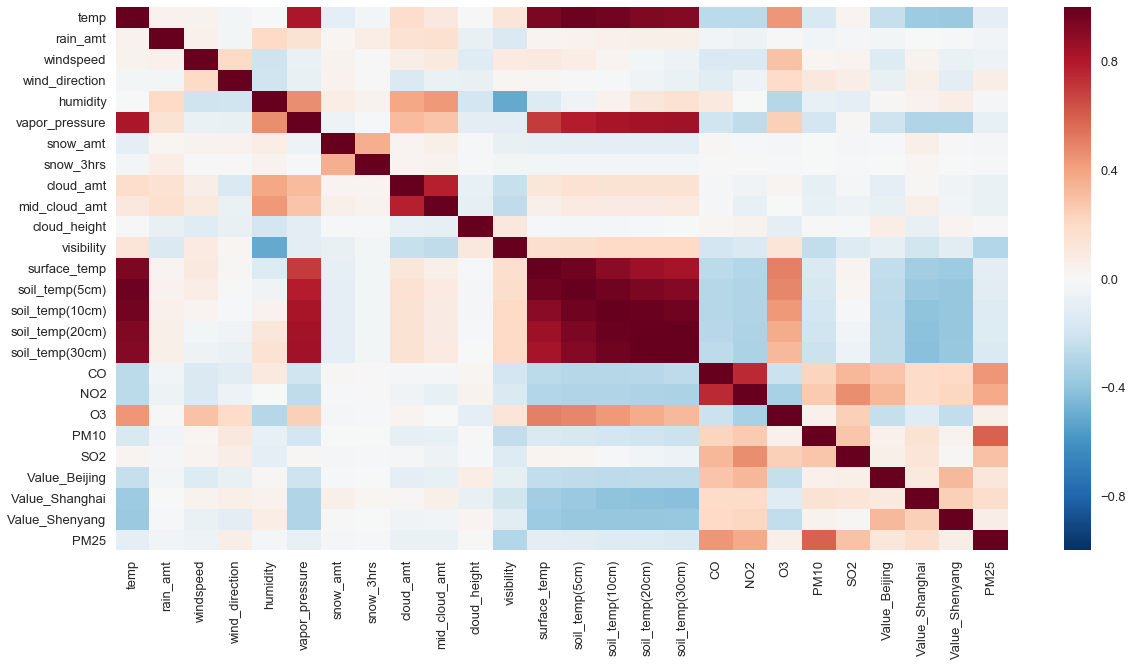

In [94]:
plt.clf()
corr = train_set.iloc[:,5:].corr()
plt.figure(figsize = (20, 10))
sns.heatmap(corr)
#plt.show()

#### We are curious about the correlation of PM2.5 with other variables. By looking at the last row on y-axis, we can spot the last 8 variables which have higher correlation with PM2.5.
#### Let's get the 'numerical values'  of these correlations for more objective analysis.

In [95]:
corr_list ={}
for var in train_set.columns[22:]:
    corr = train_set[var].corr(train_set.PM25)
    corr_list[var] = round(corr, 2)
    print ('- Correlation of {} and PM2.5 is {:.2f}'.format(var, corr)) 
# for var in ['wind_direction', 'humidity']:
#     corr = train_set[var].corr(train_set.PM25)
#     print ('- Correlation of {} and PM2.5 is {:.2f}'.format(var, corr)) 
#     corr = train_set[var].corr(train_set.PM25)
#     corr_list[var] = round(corr, 2)

- Correlation of CO and PM2.5 is 0.44
- Correlation of NO2 and PM2.5 is 0.38
- Correlation of O3 and PM2.5 is 0.06
- Correlation of PM10 and PM2.5 is 0.59
- Correlation of SO2 and PM2.5 is 0.29
- Correlation of Value_Beijing and PM2.5 is 0.11
- Correlation of Value_Shanghai and PM2.5 is 0.17
- Correlation of Value_Shenyang and PM2.5 is 0.06
- Correlation of PM25 and PM2.5 is 1.00


#### Sorted

In [96]:
for key in sorted(corr_list, key=corr_list.get, reverse=True):
    print (key, corr_list[key])

PM25 1.0
PM10 0.59
CO 0.44
NO2 0.38
SO2 0.29
Value_Shanghai 0.17
Value_Beijing 0.11
O3 0.06
Value_Shenyang 0.06


### I found the result pretty interesting. From the above we can interpret:
* PM2.5 is highly correlated with PM10, CO, and NO2... which tells us that, when we have high PM2.5 values, there are high possibilities that other air pollution indicators would be high as well. Here we can have a life lesson: bad things all come together!
* The second interesting part is the correlation with PM2.5 levels of major cities in China. This is actually lower than I had expected, because the well-known fact is that Westerlies bring the dusts and microsands to Korea. But we should note that there is a TIME GAP; it will be more reasonable to calculate the correlation with time shift since it takes few hours and days for winds to carry dusts into Korean peninsula. We will look at it more carefully after few more steps.

# Does wind-direction affect the dust level?

#### In our data, wind_direction is written in the scale of 360 degree azimuth.

In [97]:
print (train_set['wind_direction'].value_counts().sort_index())

0.0       528
20.0      944
50.0     1892
70.0     2576
90.0      554
110.0     280
140.0     210
160.0     194
180.0     168
200.0     602
230.0    1276
250.0    1676
270.0    3018
290.0    2168
320.0     728
340.0     426
360.0     304
Name: wind_direction, dtype: int64


#### Somthing is not making a sense on the numbers above.  
#### In 360 degree azimuth,  degree 0 and degree 360 is the same. We should make an adjustment. 

In [98]:
train_set['wind_direction'].replace(0, 360, inplace = True)

20.0      944
50.0     1892
70.0     2576
90.0      554
110.0     280
140.0     210
160.0     194
180.0     168
200.0     602
230.0    1276
250.0    1676
270.0    3018
290.0    2168
320.0     728
340.0     426
360.0     832
Name: wind_direction, dtype: int64


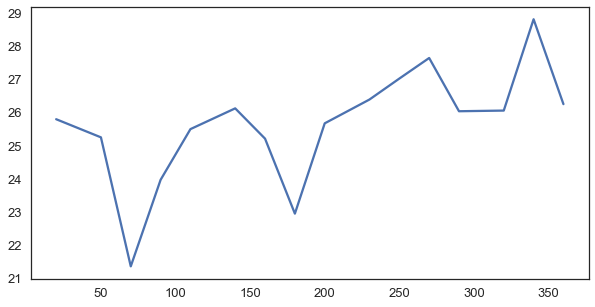

In [99]:
print (train_set['wind_direction'].value_counts().sort_index())
plt.figure(figsize=(10,5))
plt.plot(train_set.groupby('wind_direction')['PM25'].mean())

### Above graph is VERY INTERESTING. Let's take a look.
<Br>
<Br>

<img src = http://academic.brooklyn.cuny.edu/geology/leveson/core/graphics/mapgraphics/circ-360newsx3.gif>

* The level of microdust is relatively low betweeen 50 ~ 100 degrees and 150 ~ 200 degrees, and in contrast, the level becomes extremely high after 300 degree. (FYI, degree 360 means the the wind is blowing 'FROM' North towards South.)
* High level of microdust around 360 degree can be explained by the hypothesis that polluted air from China is coming from the North.
* However, it is hard to come up with a solid hypothesis on why the level is NOT LOW between 100 ~ 150 degrees(note that 100 ~ 150 degree point is BETWEEN two very low level degree points)

### Maybe...... it's related to the other variable: wind speed. 
### My guess is that the magnitude of wind coming from 100 ~ 150 degree is relatively weak, and therefore, cannot push the dusts out of the peninsula. Let's check.

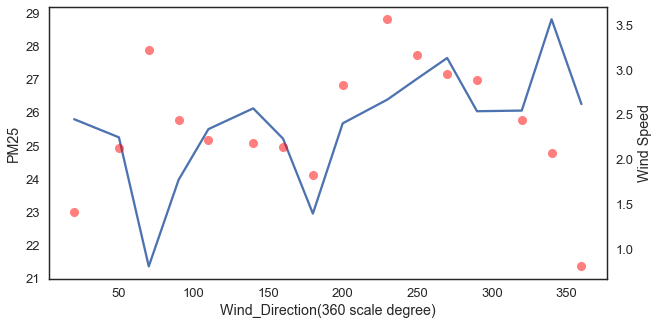

In [100]:
fig, ax1 = plt.subplots(figsize = (10,5))
ax1.plot(train_set.groupby('wind_direction')['PM25'].mean())
ax1.set_xlabel('Wind_Direction(360 scale degree)')
ax1.set_ylabel('PM25')

ax2 = ax1.twinx()
ax2.plot(train_set.groupby('wind_direction')['windspeed'].mean(), 'ro', alpha = 0.5)
ax2.set_ylabel('Wind Speed')


#### We can find few important trends from the graph above.
* First, the microdust level is HIGH when the wind blows from North and West. The windspeed does not affect much during this season.
* Second, the microdust level is LOW when the wind blows from South and East. So the windspeed DOES MATTER in this case. If the wind is not strong enough, the dust level can be still high even if the wind blows from South and East.

#### The box plot also shows us that the wind from South and East prevents high microdust level

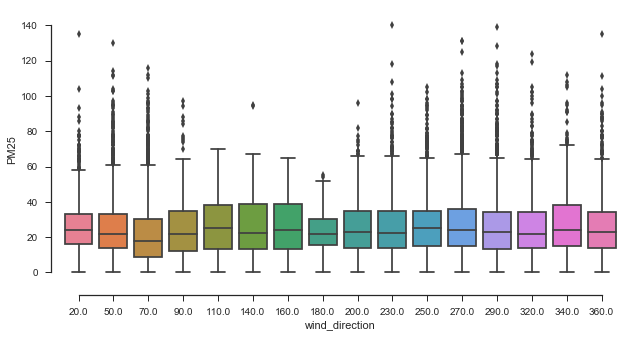

In [101]:
sns.set(style="ticks")
plt.figure(figsize=(10,5))
sns.boxplot(x = train_set['wind_direction'], y=train_set['PM25'], palette="husl")
sns.despine(offset=10, trim=True)

### The insights found from the above can be applied to the prediction. 
#### I am going to create a categorical variable called "Wind from WestNorth' for the prediction DataFrame. 
#### This categorical variable is simpler and less tricky compared to 'wind_direction', which shows non-linear trend with the increment of the value and also may add up too many dimension when transforming into one-hot vector.

# When is the worst seasons for dust?

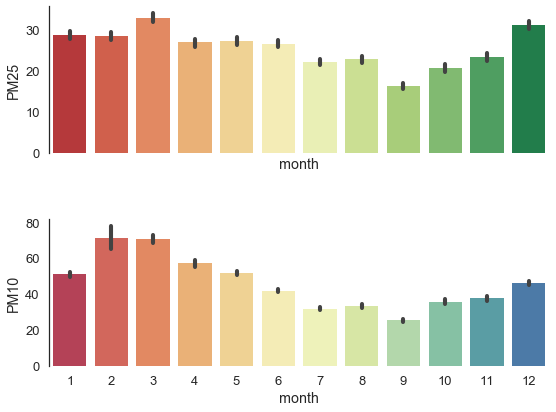

In [102]:
sns.set(style="white", context="talk")
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
sns.barplot(train_set['month'], train_set['PM25'], palette='RdYlGn', ax = ax1)
ax1.set_ylabel("PM25")
sns.barplot(train_set['month'], train_set['PM10'], palette='Spectral', ax = ax2)
ax2.set_ylabel("PM10")
sns.despine(bottom=True)
#plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=3)

#### Quick interpretation of the data
* 'Spring' seems to be the worst season to have outdooor activities; both PM2.5 and PM10 are the highest during the spring. 
* PM10 has higher range compared to PM2.5, although they show similarities in trend.
* Similar to 'Wind_Direction', 'Month' is also a categorical variable which can add 'too many dimenstions' by transfomrating it to one-hot vector. I will later reduce the varibale to '4 seasons', so that I can use the variable with fewer number of dimension.

# The correlation of microdust in Korea and major cities in China

#### Let's come back to this topic and take a deeper look. We can start with finding the trend with plot graph.

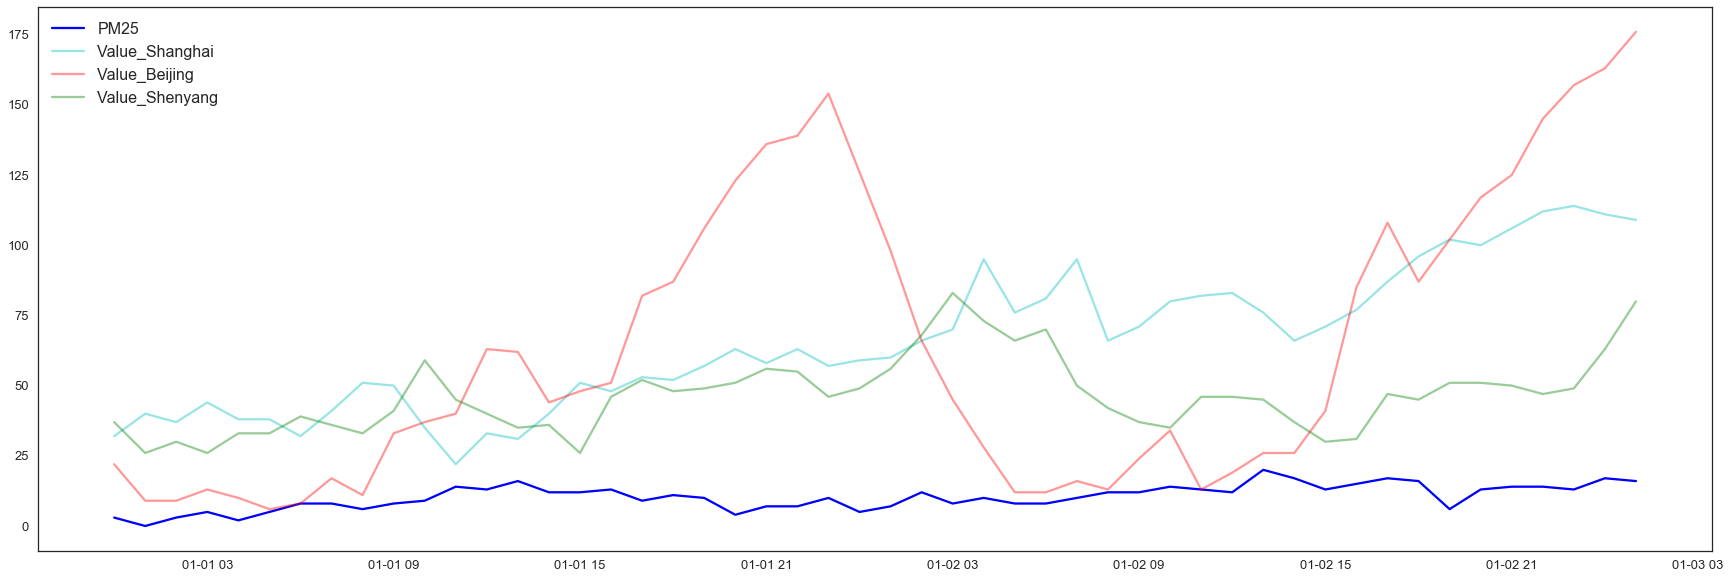

In [103]:
plt.clf()
plt.figure(figsize=(30, 10))
plt.plot(train_set.date_time[:50], train_set.PM25[:50], color = 'b') 
plt.plot(train_set.date_time[:50], train_set['Value_Shanghai'][:50], color = 'c', alpha=0.4) 
plt.plot(train_set.date_time[:50], train_set['Value_Beijing'][:50], color ='r', alpha=0.4)
plt.plot(train_set.date_time[:50], train_set['Value_Shenyang'][:50], color = 'g', alpha = 0.4)
ax = plt.subplot(111)
ax.legend(prop = {'size': 16})

#### Wow. Eventhough we are comparing the variables with the same scale(PM2.5), the graph does not fit because cities in China have much higher values. Let's adjust the graph.

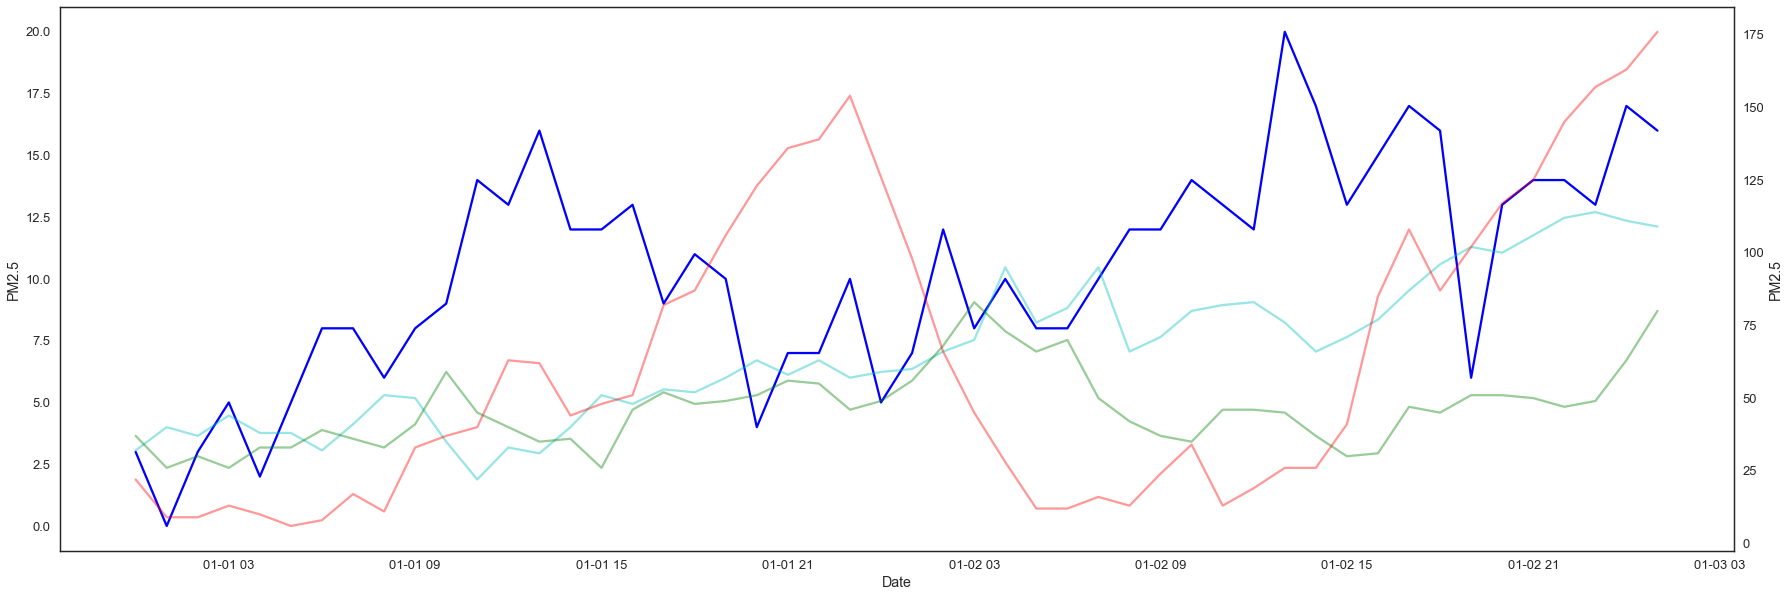

In [105]:
plt.clf()
fig, ax1 = plt.subplots(figsize = (30, 10), sharex=True)

ax1.plot(train_set.date_time[:50], train_set.PM25[:50], color = 'b') 
ax1.set_xlabel("Date")
ax1.set_ylabel("PM2.5")

ax2 = ax1.twinx()
ax2.plot(train_set.date_time[:50], train_set['Value_Shanghai'][:50], color = 'c', alpha=0.4) 
ax2.plot(train_set.date_time[:50], train_set['Value_Beijing'][:50], color ='r', alpha=0.4)
ax2.plot(train_set.date_time[:50], train_set['Value_Shenyang'][:50], color = 'g', alpha = 0.4)
ax2.set_ylabel("PM2.5")


#### Below is the graph of PM 10

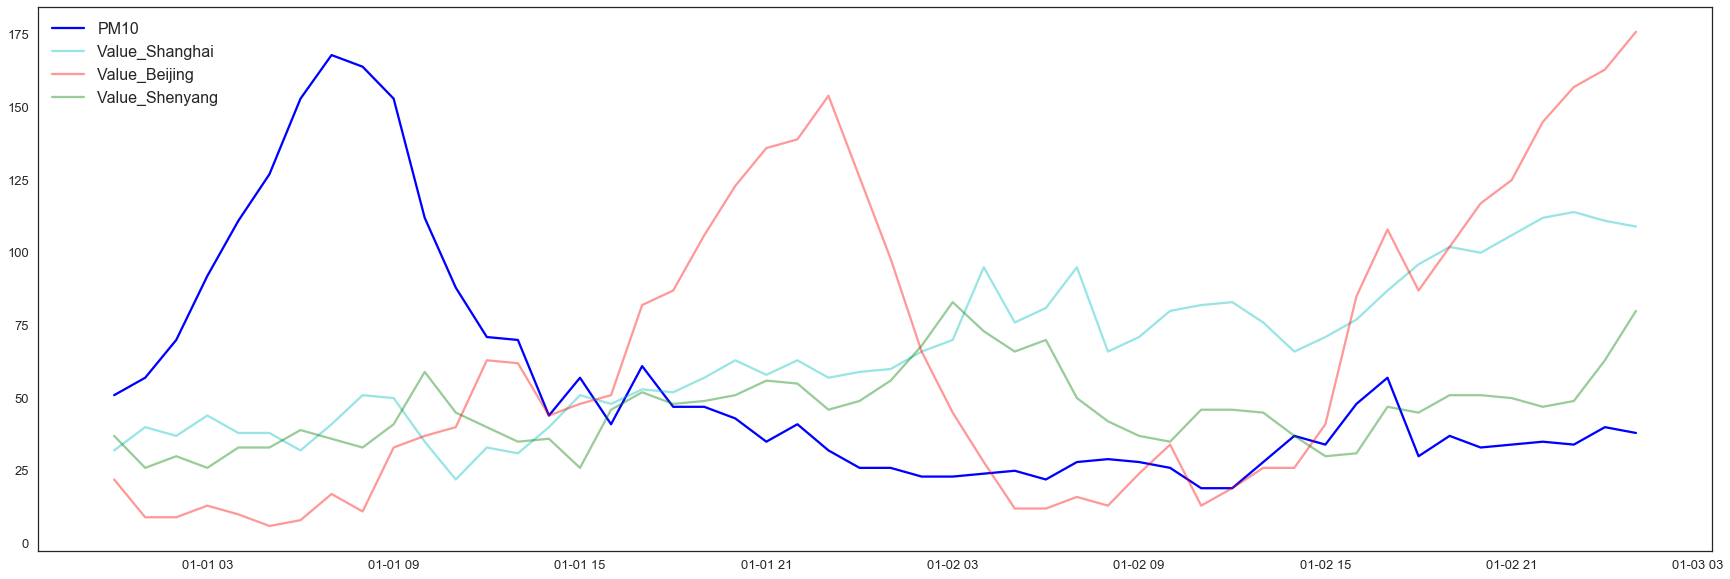

In [106]:
plt.clf()
plt.figure(figsize=(30, 10))
plt.plot(train_set.date_time[:50], train_set.PM10[:50], color = 'b') 
plt.plot(train_set.date_time[:50], train_set['Value_Shanghai'][:50], color = 'c', alpha=0.4) 
plt.plot(train_set.date_time[:50], train_set['Value_Beijing'][:50], color ='r', alpha=0.4)
plt.plot(train_set.date_time[:50], train_set['Value_Shenyang'][:50], color = 'g', alpha = 0.4)
ax = plt.subplot(111)
ax.legend(prop = {'size': 16})

#### My initial guess was that the Korean graph will follow the shape of China graph with a certain time gap.  But it's hard to find the trend from the graph above. So let's just calculate the NUMBER.

### The speed of westerlies is approx. 30m/sec (108km / hr).  
####  The calculation with the given speed tells us it will take around 8 hours for the dust from Shanghai to arrive Seoul.  
#### But we do not know the range of this speed.  So let's just compare the correlation with scenarios of time gaps.

In [107]:
def correlation_comparison(cityname):
    city = train_set[cityname][:]
    pm25 = train_set_label[:]
    #pm25 = train_set['PM25'][:]
    time = int(-6)
    for i in range(12):
        pm25.drop(pm25.index[:6], axis = 0, inplace = True)
        print ("Time gap=({}): ".format(time), round(pm25.corr(city[:time]),3))
        time -= 6

In [108]:
print ("[The Correlation with PM2.5 of major Chineses cities: Time gap=(-6) means 6 hours ahead")
print("Shanghai - 868 km from Seoul")
print (correlation_comparison("Value_Shanghai"))
print ("Beijing - 956 km from Seoul")
print (correlation_comparison("Value_Beijing"))
print ("Shenyang - 561 km from Seoul")
print (correlation_comparison("Value_Shenyang"))

[The Correlation with PM2.5 of major Chineses cities: Time gap=(-6) means 6 hours ahead
Shanghai - 868 km from Seoul
Time gap=(-6):  0.174
Time gap=(-12):  0.174
Time gap=(-18):  0.174
Time gap=(-24):  0.174
Time gap=(-30):  0.174
Time gap=(-36):  0.174
Time gap=(-42):  0.175
Time gap=(-48):  0.175
Time gap=(-54):  0.176
Time gap=(-60):  0.177
Time gap=(-66):  0.177
Time gap=(-72):  0.177
None
Beijing - 956 km from Seoul
Time gap=(-6):  0.111
Time gap=(-12):  0.109
Time gap=(-18):  0.109
Time gap=(-24):  0.109
Time gap=(-30):  0.108
Time gap=(-36):  0.108
Time gap=(-42):  0.108
Time gap=(-48):  0.109
Time gap=(-54):  0.11
Time gap=(-60):  0.11
Time gap=(-66):  0.11
Time gap=(-72):  0.111
None
Shenyang - 561 km from Seoul
Time gap=(-6):  0.062
Time gap=(-12):  0.062
Time gap=(-18):  0.062
Time gap=(-24):  0.062
Time gap=(-30):  0.062
Time gap=(-36):  0.062
Time gap=(-42):  0.062
Time gap=(-48):  0.062
Time gap=(-54):  0.062
Time gap=(-60):  0.062
Time gap=(-66):  0.062
Time gap=(-72):  

#### The correlation slightly rises with higher time gap.  I have used the '2 days gap' for the prediction; the microdust level of two days ago in China will be used for the prediction of microdust level in Seoul for today.

In [109]:
train_set.set_index('date_time', drop = True, inplace = True)
test_set.set_index('date_time', drop = True, inplace = True)

<br>

<br>
<br>
<br>
# Prediction

#### Time for the prediction. Let's start by importing the fc_train and fc_test DataFrame that I have prepared previously on the other Jupyter Notebook

In [21]:
fc_train = pickle.load(open('fc_train.p', 'rb'))
fc_test =  pickle.load(open('fc_test.p', 'rb'))

In [22]:
fc_train.head()

,day,hour,forecast,fc_temp,fc_humid,fc_rain,fc_wind_d,fc_wind_s,month,date_time
0,1,2,46.0,-6.0,50.0,0.0,102.0,1.0,1,2015-01-01 02:00:00
1,1,5,46.0,-1.0,45.0,10.0,129.0,2.0,1,2015-01-01 05:00:00
2,1,8,46.0,1.0,50.0,20.0,159.0,2.0,1,2015-01-01 08:00:00
3,1,11,46.0,0.0,55.0,20.0,150.0,2.0,1,2015-01-01 11:00:00
4,1,14,46.0,0.0,65.0,20.0,146.0,2.0,1,2015-01-01 14:00:00


### Let's add today's dust and weather data into the forecast data

In [23]:
fc_train['today_PM25'] = fc_train.date_time.map(train_set.PM25)
fc_train['today_PM10'] = fc_train.date_time.map(train_set.PM10)
fc_train['today_CO'] = fc_train.date_time.map(train_set.CO)
fc_train['today_NO2'] = fc_train.date_time.map(train_set.NO2)
fc_train['today_windspeed'] = fc_train.date_time.map(train_set.windspeed)
fc_train['today_direction'] = fc_train.date_time.map(train_set.wind_direction)
fc_train['today_Beijing'] = fc_train.date_time.map(train_set.Value_Beijing)
fc_train['today_Shanghai'] = fc_train.date_time.map(train_set.Value_Shanghai)
fc_train['today_Shenyang'] = fc_train.date_time.map(train_set.Value_Shenyang)

In [24]:
fc_train = fc_train[['date_time', 'today_PM25', 'today_PM10', 'today_CO', 'today_NO2', 'today_windspeed',
                    'today_direction', 'today_Beijing', 'today_Shanghai', 'today_Shenyang', 
                    'fc_temp', 'fc_humid', 'fc_rain', 'fc_wind_d', 'fc_wind_s']]

In [25]:
fc_train.head()

,date_time,today_PM25,today_PM10,today_CO,today_NO2,today_windspeed,today_direction,today_Beijing,today_Shanghai,today_Shenyang,fc_temp,fc_humid,fc_rain,fc_wind_d,fc_wind_s
0,2015-01-01 02:00:00,3.0,70.0,0.2,0.008,4.5,290.0,9.0,37.0,30.0,-6.0,50.0,0.0,102.0,1.0
1,2015-01-01 05:00:00,5.0,127.0,0.2,0.006,5.7,290.0,6.0,38.0,33.0,-1.0,45.0,10.0,129.0,2.0
2,2015-01-01 08:00:00,6.0,164.0,0.2,0.011,6.1,270.0,11.0,51.0,33.0,1.0,50.0,20.0,159.0,2.0
3,2015-01-01 11:00:00,14.0,88.0,0.2,0.007,4.5,290.0,40.0,22.0,45.0,0.0,55.0,20.0,150.0,2.0
4,2015-01-01 14:00:00,12.0,44.0,0.2,0.008,5.7,290.0,44.0,40.0,36.0,0.0,65.0,20.0,146.0,2.0


In [26]:
# Are there any NaN values?
fc_train.isnull().values.any()

False

#### As previously explained, I will change the 'months' data to 'season', since it adds fewer dimensions and still represents the characterstics. 

In [27]:
fc_train = fc_train.assign(month = lambda x: x.date_time.map(lambda x: x.month))

In [28]:
def convert_to_season(month):
    if month in [12, 1, 2, 3]:
        return "winter"
    elif month in [4, 5]:
        return "spring"
    elif month in [6, 7, 8, 9]:
        return "summer"
    else:
        return "fall"      

In [29]:
fc_train = fc_train.assign(season = lambda x: x['month'].map(convert_to_season))

In [30]:
dummy = pd.get_dummies(fc_train['season'], drop_first=True)
fc_train = pd.concat([fc_train, dummy], axis = 1)

#### Also as explained, I will change the wind_direction to the binary categorical values. 

In [31]:
fc_train['today_direction'] = fc_train['today_direction'].apply(lambda x: 1 if x > 225 or x < 45 else 0)
fc_train['fc_wind_d'] = fc_train['fc_wind_d'].apply(lambda x: 1 if x > 225 or x < 45 else 0)
print (fc_train['today_direction'].value_counts())
print (fc_train['fc_wind_d'].value_counts())

1    3638
0    2129
Name: today_direction, dtype: int64
1    3301
0    2466
Name: fc_wind_d, dtype: int64


#### Ground Truth(gt) should be the actual PM2.5 level of 2 days after

In [32]:
fc_train['gt'] = (fc_train.date_time + timedelta(days = 2)).map(train_set.PM25)

In [33]:
fc_train.reset_index(drop = True, inplace=True)
fc_train.tail(50)

,date_time,today_PM25,today_PM10,today_CO,today_NO2,today_windspeed,today_direction,today_Beijing,today_Shanghai,today_Shenyang,...,fc_humid,fc_rain,fc_wind_d,fc_wind_s,month,season,spring,summer,winter,gt
5717,2016-12-25 20:00:00,44.0,59.0,1.2,0.060,2.1,0,207.0,24.0,82.0,...,45.0,0.0,1,3.0,12,winter,0,0,1,18.0
5718,2016-12-25 23:00:00,42.0,55.0,1.1,0.058,3.8,1,170.0,21.0,82.0,...,50.0,0.0,1,2.0,12,winter,0,0,1,16.0
5719,2016-12-26 02:00:00,37.0,49.0,1.1,0.050,3.2,1,165.0,17.0,82.0,...,45.0,0.0,1,1.0,12,winter,0,0,1,24.0
5720,2016-12-26 05:00:00,35.0,46.0,1.0,0.042,2.3,1,116.0,13.0,82.0,...,35.0,0.0,1,3.0,12,winter,0,0,1,18.0
5721,2016-12-26 08:00:00,37.0,47.0,1.2,0.046,4.1,1,51.0,30.0,82.0,...,30.0,0.0,1,3.0,12,winter,0,0,1,23.0
5722,2016-12-26 11:00:00,41.0,51.0,1.2,0.044,2.4,1,21.0,48.0,82.0,...,35.0,0.0,1,3.0,12,winter,0,0,1,34.0
5723,2016-12-26 14:00:00,31.0,43.0,0.8,0.053,3.7,1,12.0,32.0,82.0,...,50.0,10.0,1,2.0,12,winter,0,0,1,42.0
5724,2016-12-26 17:00:00,12.0,29.0,0.7,0.056,3.2,1,15.0,18.0,82.0,...,55.0,10.0,1,2.0,12,winter,0,0,1,20.0
5725,2016-12-26 20:00:00,36.0,48.0,0.9,0.051,2.1,1,15.0,15.0,82.0,...,62.0,20.0,1,2.0,12,winter,0,0,1,35.0
5726,2016-12-26 23:00:00,39.0,52.0,0.7,0.033,2.3,0,14.0,26.0,82.0,...,70.0,60.0,1,3.0,12,winter,0,0,1,17.0


#### Eliminating the NaN values created by shifting the time

In [34]:
fc_train.drop(fc_train.index[5751:], inplace=True, axis = 0)

### Repeat the job for Test_FC

In [35]:
fc_test['today_PM25'] = fc_test.date_time.map(test_set.PM25)
fc_test['today_PM10'] = fc_test.date_time.map(test_set.PM10)
fc_test['today_CO'] = fc_test.date_time.map(test_set.CO)
fc_test['today_NO2'] = fc_test.date_time.map(test_set.NO2)
fc_test['today_windspeed'] = fc_test.date_time.map(test_set.windspeed)
fc_test['today_direction'] = fc_test.date_time.map(test_set.wind_direction)
fc_test['today_Beijing'] = fc_test.date_time.map(test_set.Value_Beijing)
fc_test['today_Shanghai'] = fc_test.date_time.map(test_set.Value_Shanghai)
fc_test['today_Shenyang'] = fc_test.date_time.map(test_set.Value_Shenyang)

In [36]:
fc_test.columns

Index(['day', 'hour', 'forecast', 'fc_temp', 'fc_humid', 'fc_rain',
       'fc_wind_d', 'fc_wind_s', 'month', 'date_time', 'today_PM25',
       'today_PM10', 'today_CO', 'today_NO2', 'today_windspeed',
       'today_direction', 'today_Beijing', 'today_Shanghai', 'today_Shenyang'],
      dtype='object')

In [37]:
fc_test = fc_test[['date_time', 'today_PM25', 'today_PM10', 'today_CO', 'today_NO2', 'today_windspeed',
                    'today_direction', 'today_Beijing', 'today_Shanghai', 'today_Shenyang', 
                    'fc_temp', 'fc_humid', 'fc_rain', 'fc_wind_d', 'fc_wind_s']]

In [38]:
fc_test.isnull().values.any()

False

In [39]:
fc_test = fc_test.assign(month = lambda x: x.date_time.map(lambda x: x.month))

In [40]:
fc_test = fc_test.assign(season = lambda x: x['month'].map(convert_to_season))

In [41]:
dummy = pd.get_dummies(fc_test['season'], drop_first=False)
fc_test = pd.concat([fc_test, dummy], axis = 1)

In [42]:
fc_test['today_direction'] = fc_test['today_direction'].apply(lambda x: 1 if x > 225 or x < 45 else 0)
fc_test['fc_wind_d'] = fc_test['fc_wind_d'].apply(lambda x: 1 if x > 225 or x < 45 else 0)
print (fc_test['today_direction'].value_counts())
print (fc_test['fc_wind_d'].value_counts())

1    1021
0     427
Name: today_direction, dtype: int64
1    898
0    550
Name: fc_wind_d, dtype: int64


In [43]:
fc_test['gt'] = (fc_test.date_time + timedelta(days = 2)).map(test_set.PM25)

In [44]:
fc_test.reset_index(drop = True, inplace=True)
fc_test.tail(50)

,date_time,today_PM25,today_PM10,today_CO,today_NO2,today_windspeed,today_direction,today_Beijing,today_Shanghai,today_Shenyang,...,fc_humid,fc_rain,fc_wind_d,fc_wind_s,month,season,spring,summer,winter,gt
1398,2017-06-24 20:00:00,29.0,38.0,0.5,0.036,3.7,1,27.0,43.0,-1.0,...,70.0,30.0,1,2.0,6,summer,0,1,0,13.0
1399,2017-06-24 23:00:00,25.0,33.0,0.5,0.047,2.2,1,28.0,33.0,10.0,...,70.0,30.0,0,1.3,6,summer,0,1,0,9.0
1400,2017-06-25 02:00:00,23.0,32.0,0.6,0.054,0.8,1,32.0,27.0,15.0,...,60.0,30.0,0,2.2,6,summer,0,1,0,10.0
1401,2017-06-25 05:00:00,25.0,36.0,0.6,0.034,0.4,1,49.0,13.0,6.0,...,55.0,30.0,0,2.7,6,summer,0,1,0,10.0
1402,2017-06-25 08:00:00,20.0,28.0,0.5,0.025,2.4,0,43.0,27.0,29.0,...,45.0,20.0,0,2.4,6,summer,0,1,0,6.0
1403,2017-06-25 11:00:00,20.0,27.0,0.4,0.022,1.3,0,46.0,31.0,-1.0,...,60.0,20.0,1,2.5,6,summer,0,1,0,12.0
1404,2017-06-25 14:00:00,27.0,34.0,0.4,0.016,3.0,0,36.0,51.0,-1.0,...,65.0,20.0,1,3.1,6,summer,0,1,0,17.0
1405,2017-06-25 17:00:00,19.0,23.0,0.5,0.029,1.9,0,-2.0,42.0,-1.0,...,70.0,20.0,1,2.5,6,summer,0,1,0,28.0
1406,2017-06-25 20:00:00,22.0,29.0,0.4,0.021,1.8,0,8.0,41.0,-1.0,...,75.0,20.0,1,1.7,6,summer,0,1,0,28.0
1407,2017-06-25 23:00:00,20.0,30.0,0.5,0.034,3.3,0,20.0,54.0,-1.0,...,75.0,20.0,1,1.4,6,summer,0,1,0,20.0


In [45]:
fc_test.drop(fc_test.index[1432:], inplace=True, axis = 0)

<br>
<br>
# Forecasting the Microdust Level of Day After Tomorrow

#### I have multiple variables with different scales.  
#### Since I am going to use linear regression and neural network that is sensitive to scale due to the greadient descent algorithm, I will first standardize the scale of the variables.

In [46]:
#fc_train_label = fc_train['gt']
#fc_train.drop('gt', axis = 1, inplace = True)
#fc_train.reset_index(drop = True, inplace = True)
#fc_train_label.reset_index(drop = True, inplace = True)

In [47]:
# fc_test_label = fc_test['gt']
# fc_test.drop('gt', axis = 1, inplace = True)
# fc_test.reset_index(drop = True, inplace = True)
# fc_test_label.reset_index(drop = True, inplace = True)

### Let's first look at the distributions of the X data to see which scaling method will be useful

In [48]:
fc_train_col_list = list(fc_train.columns)
fc_test_col_list = list(fc_test.columns)

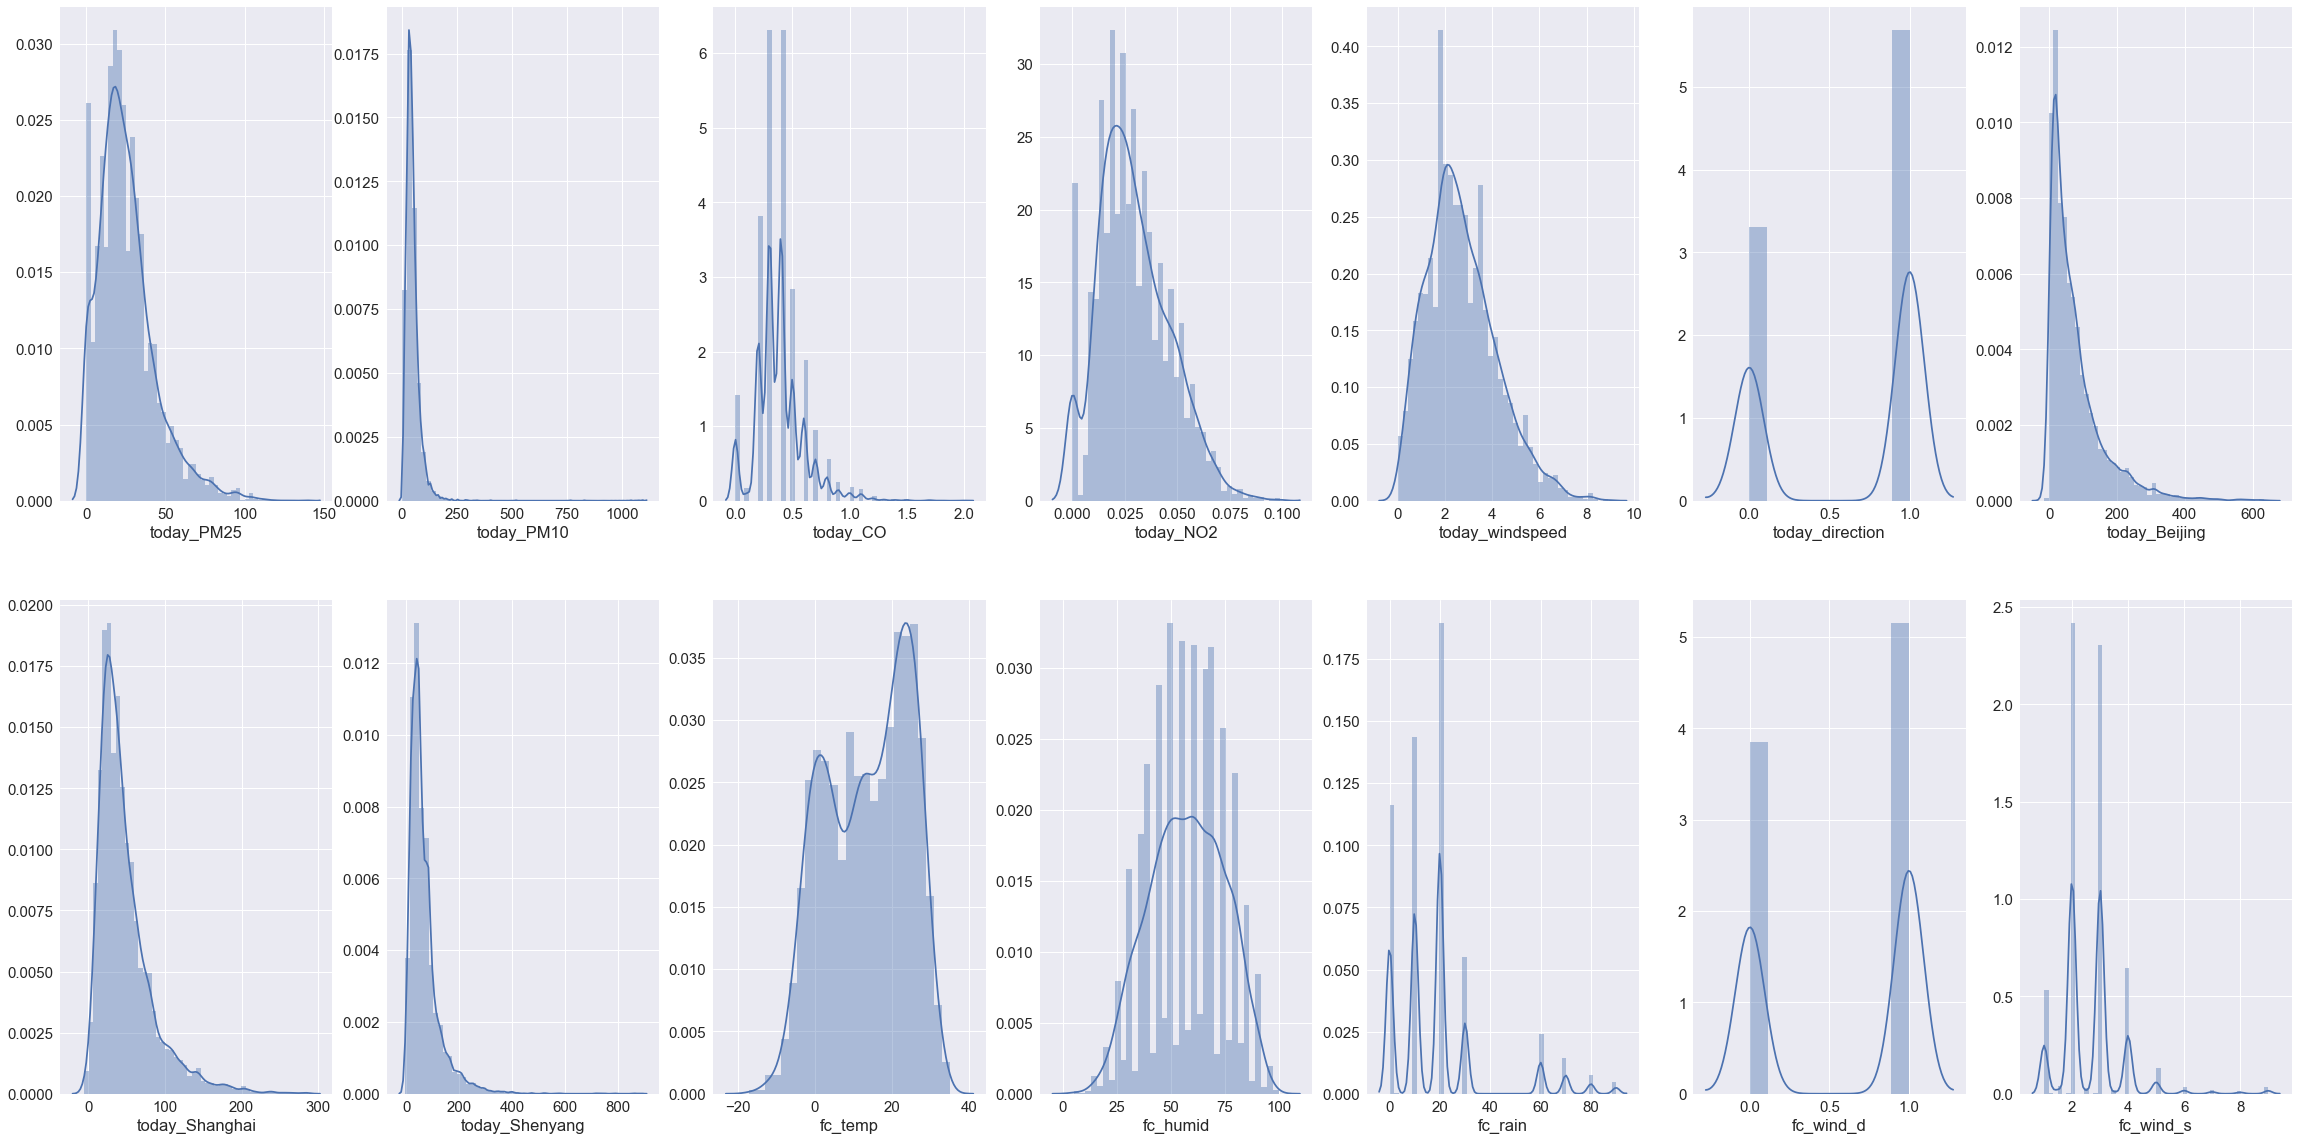

In [49]:
plt.clf()
with plt.style.context("seaborn-dark"):
    sns.set(font_scale=1.5)
    f, axes = plt.subplots(2, 7, figsize =(40, 20))
    for num, ax in zip(range(1,15), axes.flat):
        sns.distplot(a = fc_train[fc_train_col_list[0+num]], ax = ax)  

#### Because some of the variables shows skewed distribution, I tried the log-transformation as below.

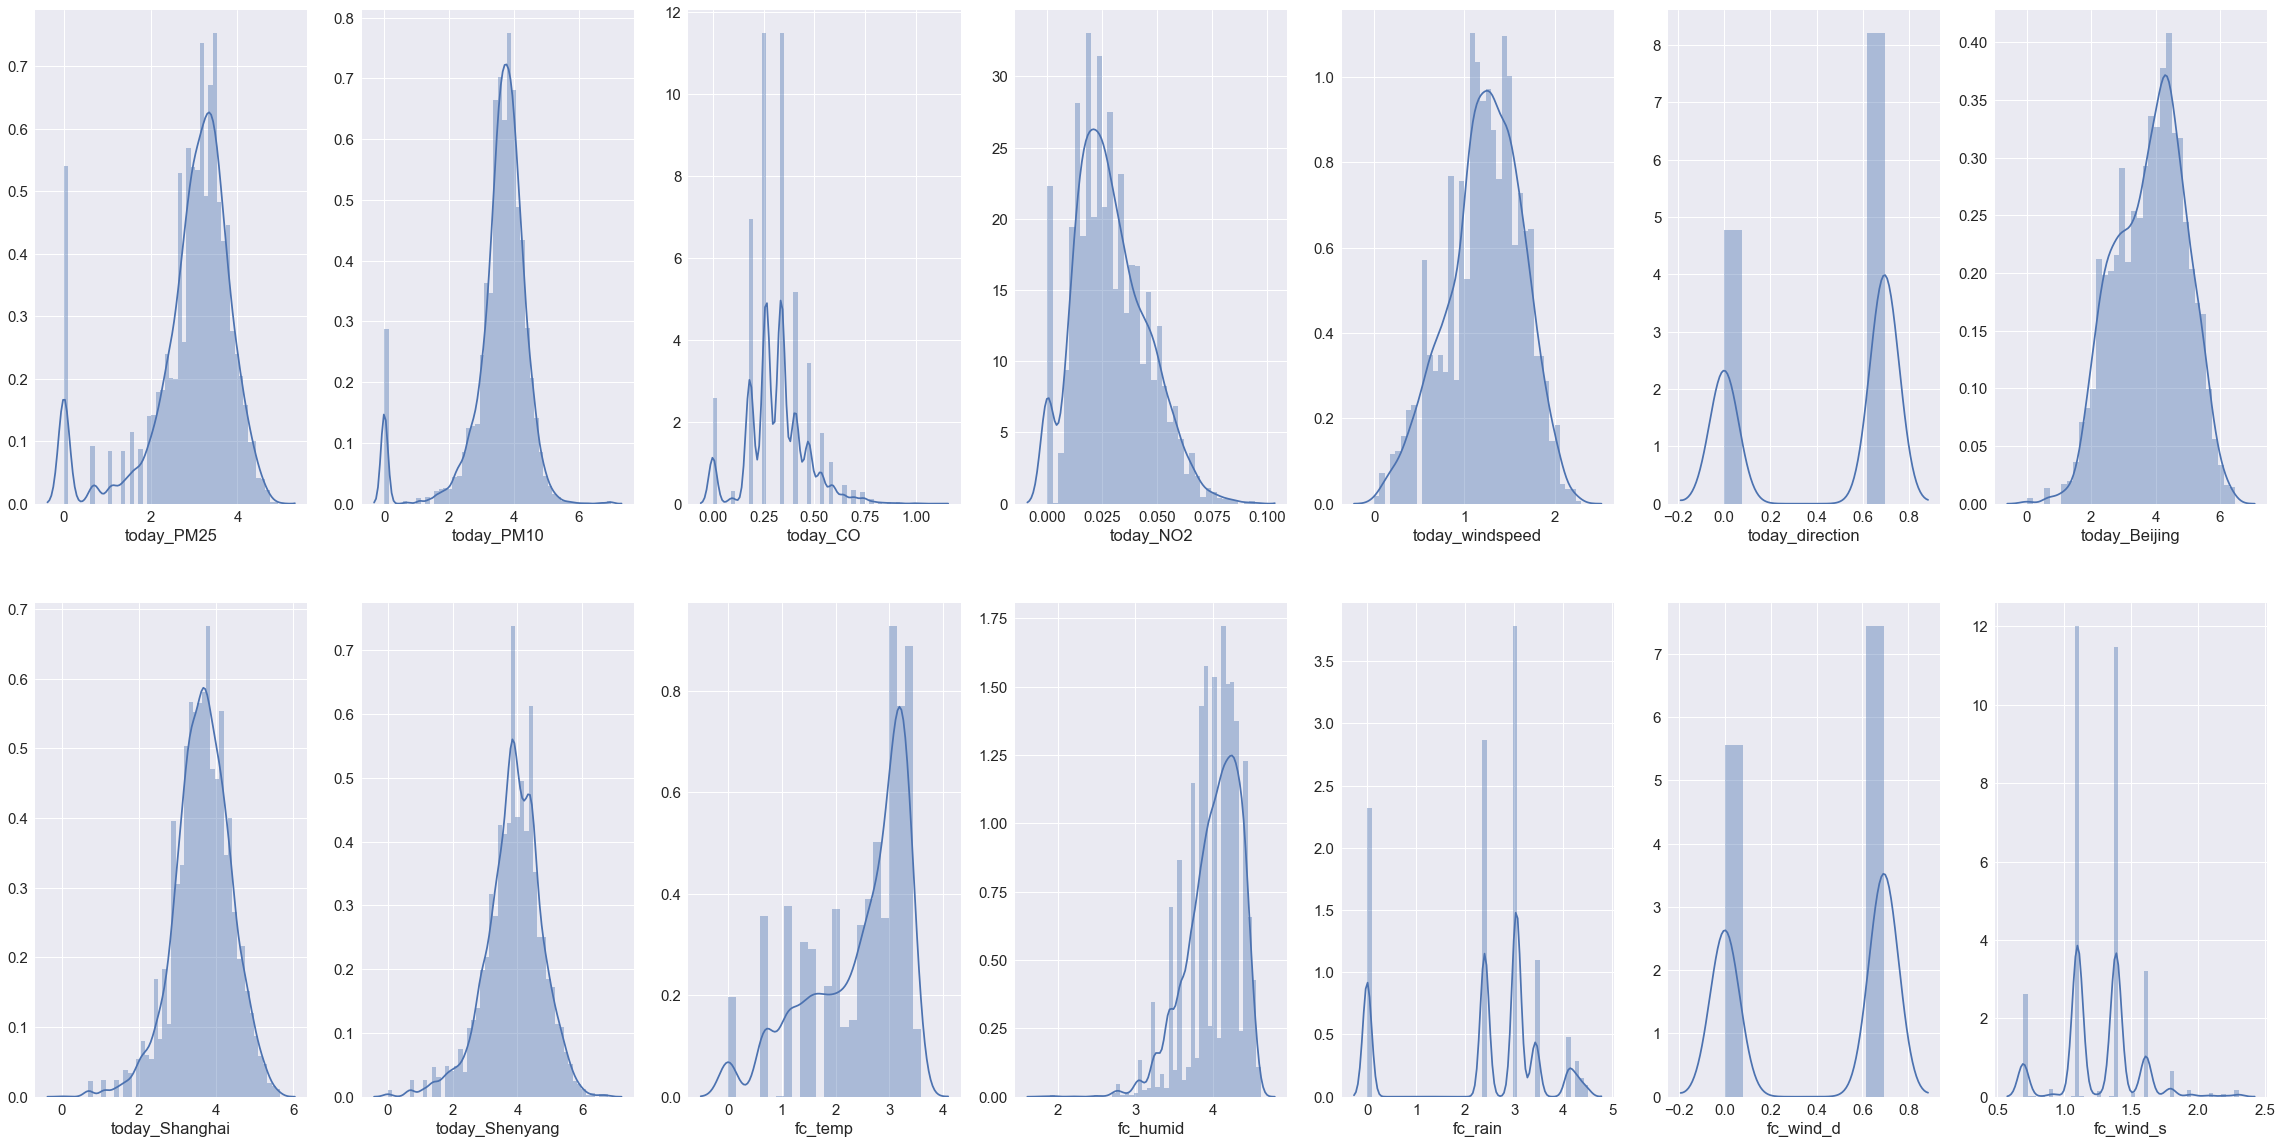

In [50]:
plt.clf()
with plt.style.context("seaborn-dark"):
    sns.set(font_scale=1.5)
    f, axes = plt.subplots(2, 7, figsize =(40, 20))
    for num, ax in zip(range(1,15), axes.flat):
        sns.distplot(a = fc_train[fc_train_col_list[0+num]].apply(lambda x: np.log(abs(x)+1)), ax = ax)  

#### Most variables were moved to the center and became more like a Gaussian distribution.  Some variables such as 'fc_temp', however, were distorted and I will exclude them from transformation.

In [51]:
fc_train_v2 = fc_train.copy()
fc_test_v2 = fc_test.copy()

In [52]:
log_var = ['today_PM25', 'today_PM10', 'today_Beijing', 'today_Shanghai', 'today_Shenyang']

In [53]:
for var in log_var:
    fc_train_v2[var +'_log'] = fc_train_v2[var].apply(lambda x: np.log(abs(x)+1))
for var in log_var:
    fc_test_v2[var +'_log'] = fc_test_v2[var].apply(lambda x: np.log(abs(x)+1))

In [54]:
fc_test_v2.head(3)

,date_time,today_PM25,today_PM10,today_CO,today_NO2,today_windspeed,today_direction,today_Beijing,today_Shanghai,today_Shenyang,...,season,spring,summer,winter,gt,today_PM25_log,today_PM10_log,today_Beijing_log,today_Shanghai_log,today_Shenyang_log
0,2017-01-01 02:00:00,59.0,71.0,1.2,0.058,4.5,1,466.0,56.0,127.0,...,winter,0,0,1,109.0,4.094345,4.276666,6.146329,4.043051,4.852030
1,2017-01-01 05:00:00,61.0,69.0,1.2,0.051,5.7,1,402.0,49.0,133.0,...,winter,0,0,1,69.0,4.127134,4.248495,5.998937,3.912023,4.897840
2,2017-01-01 08:00:00,60.0,71.0,1.0,0.045,6.1,1,472.0,52.0,158.0,...,winter,0,0,1,51.0,4.110874,4.276666,6.159095,3.970292,5.068904


### Feature scaling
* After the log transformation, the shape of data has become more like a Gaussian Normal Distribution
* I have already witnessed from EDA that the data set has a lot of outliers
* And therfore, I will use the RobustScaler() instead of StandardScaler

In [55]:
fc_train_v2.set_index('date_time', drop = True, inplace = True)
fc_test_v2.set_index('date_time', drop = True, inplace = True)

In [56]:
fc_train_v2 = fc_train_v2[['today_CO', 'today_NO2', 'today_windspeed', 'fc_temp', 'fc_humid', 'fc_rain', 'fc_wind_s',
                   'today_PM25_log', 'today_PM10_log', 'today_Beijing_log', 'today_Shanghai_log',
                   'today_Shenyang_log', 'spring', 'summer', 'winter', 'today_direction', 'fc_wind_d', 'gt']]

In [57]:
fc_test_v2 = fc_test_v2[['today_CO', 'today_NO2', 'today_windspeed', 'fc_temp', 'fc_humid', 'fc_rain', 'fc_wind_s',
                   'today_PM25_log', 'today_PM10_log', 'today_Beijing_log', 'today_Shanghai_log',
                   'today_Shenyang_log', 'spring', 'summer', 'winter', 'today_direction', 'fc_wind_d', 'gt']]

In [58]:
scale_col = ['today_CO', 'today_NO2', 'today_windspeed', 'fc_temp', 'fc_humid', 'fc_rain', 'fc_wind_s',
                   'today_PM25_log', 'today_PM10_log', 'today_Beijing_log', 'today_Shanghai_log',
                   'today_Shenyang_log']

In [59]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
fc_train_sc = pd.DataFrame(scaler.fit_transform(fc_train_v2[scale_col]), columns=scale_col, index = fc_train_v2.index)
fc_test_sc = pd.DataFrame(scaler.transform(fc_test_v2[scale_col]), columns = scale_col, index = fc_test_v2.index)

In [60]:
print (fc_train_sc.shape)
print (fc_test_sc.shape)

(5751, 12)
(1432, 12)


In [61]:
fc_train_sc = pd.concat([fc_train_sc, fc_train_v2.iloc[:,12:]], axis = 1)
fc_test_sc = pd.concat([fc_test_sc, fc_test_v2.iloc[:, 12:]], axis = 1)

In [62]:
fc_train_sc.head(3)

,today_CO,today_NO2,today_windspeed,fc_temp,fc_humid,fc_rain,fc_wind_s,today_PM25_log,today_PM10_log,today_Beijing_log,today_Shanghai_log,today_Shenyang_log,spring,summer,winter,today_direction,fc_wind_d,gt
date_time,,,,,,,,,,,,,,,,,,
2015-01-01 02:00:00,-1.0,-0.826087,1.052632,-1.105263,-0.36,-2.0,-2.0,-1.909001,0.718158,-1.005895,-0.028599,-0.469748,0,0,1,1,0,13.0
2015-01-01 05:00:00,-1.0,-0.913043,1.684211,-0.842105,-0.56,-1.0,-1.0,-1.466494,1.488947,-1.223513,0.000000,-0.378976,0,0,1,1,0,15.0
2015-01-01 08:00:00,-1.0,-0.695652,1.894737,-0.736842,-0.36,0.0,-1.0,-1.298261,1.821034,-0.894655,0.316740,-0.378976,0,0,1,1,0,19.0


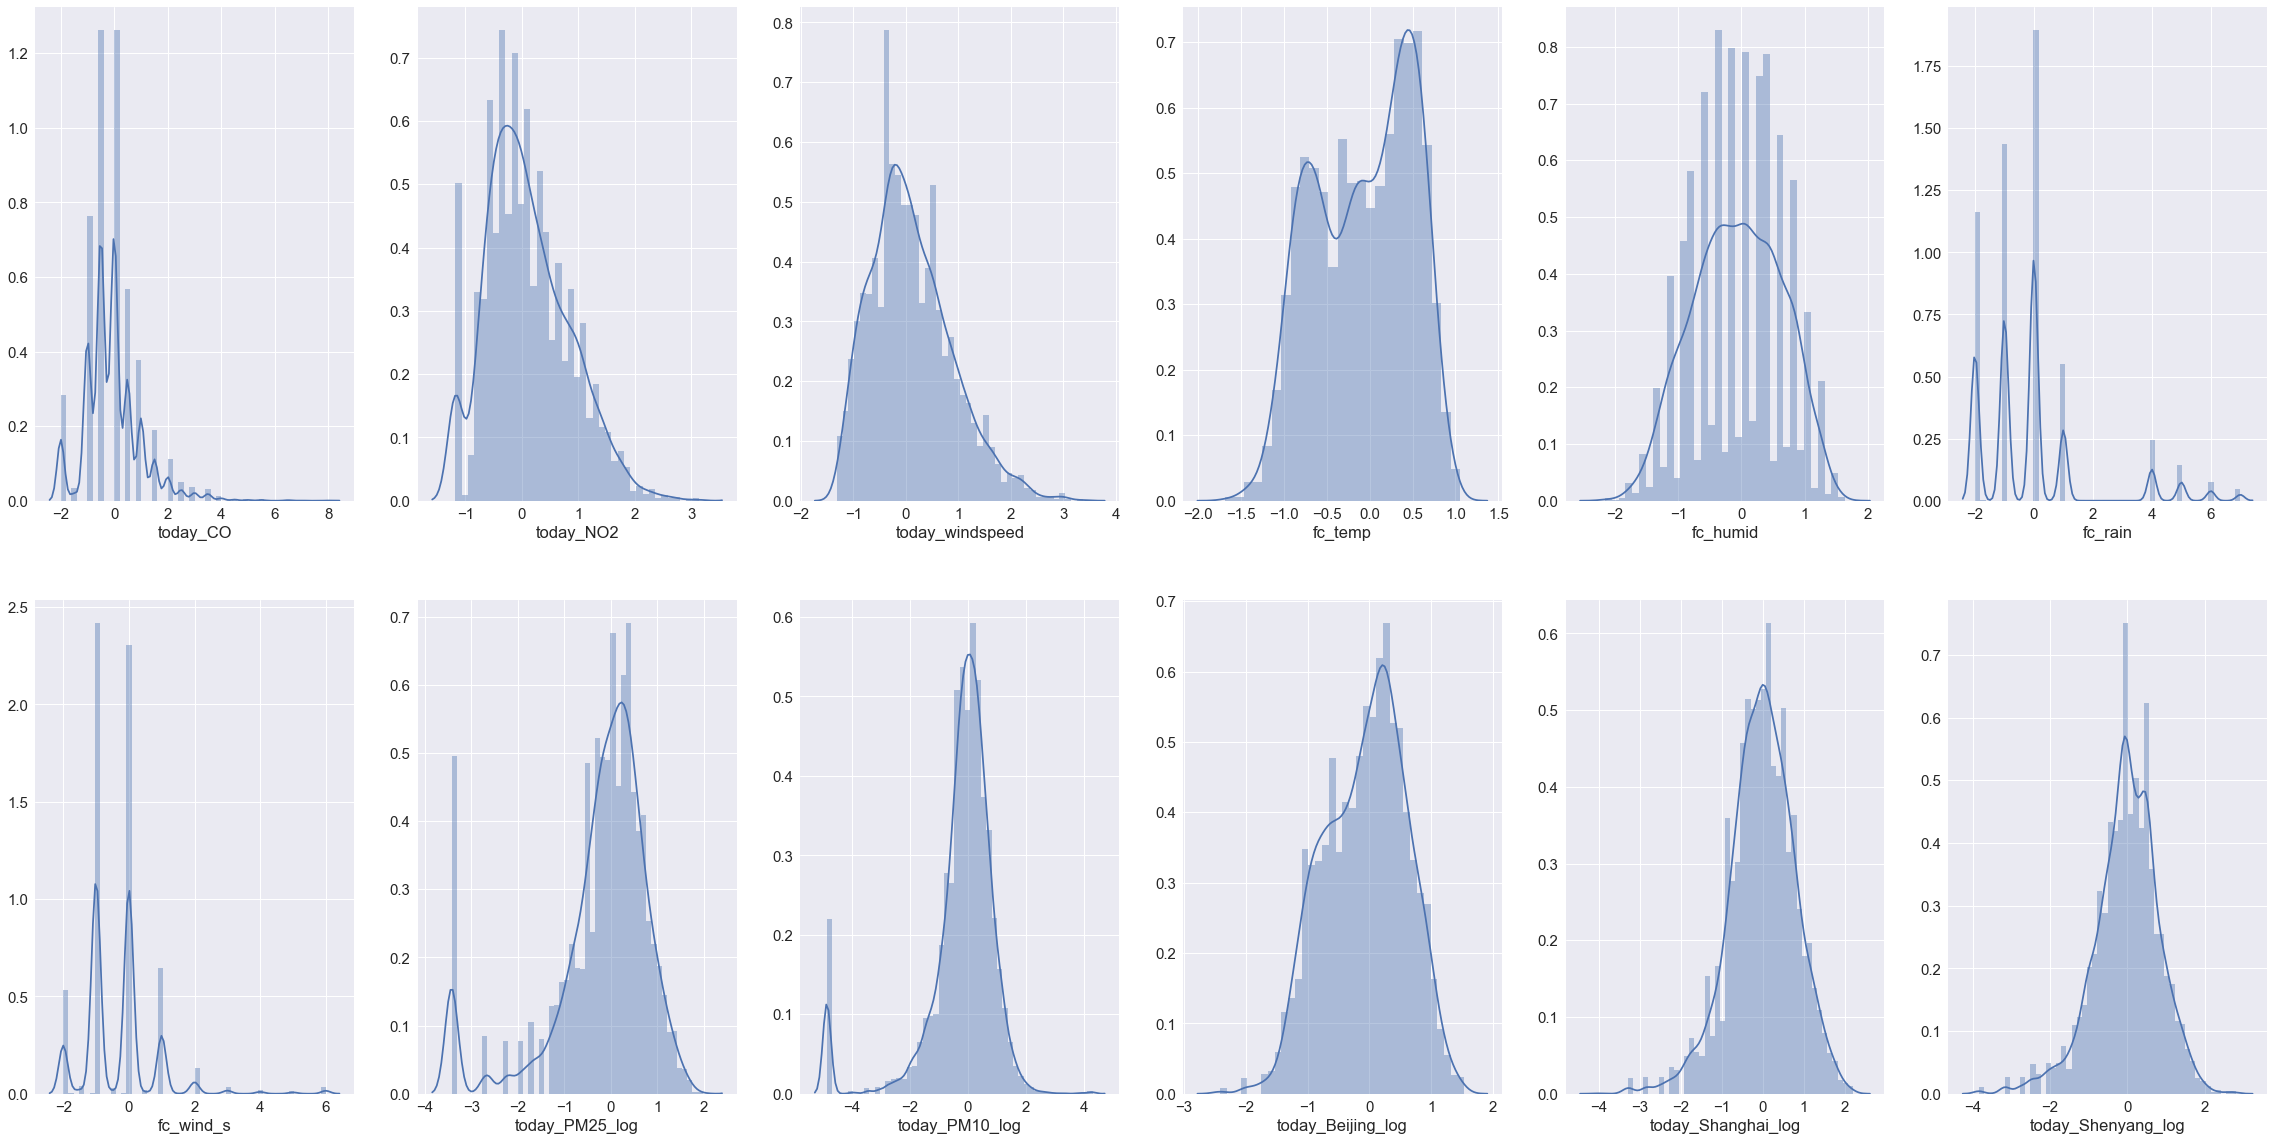

In [63]:
plt.clf()
with plt.style.context("seaborn-dark"):
    sns.set(font_scale=1.5)
    f, axes = plt.subplots(2, 6, figsize =(40, 20))
    for num, ax in zip(range(0,12), axes.flat):
        sns.distplot(a = fc_train_sc[scale_col[0+num]], ax = ax) 

#### The scaling has been completed. It's time for the PREDICTION

<br>
<br>
<br>
<br>


# Linear Regression

#### Linear Regression does not always provide the best prediction. But it's simple to use, and therefore, good to use as a reference point
#### Theoretically the result of linear regression is influenced by unbalanced scale of variables.  Let's check if our log-transformation and feature scaling has been helpful for the prediction.
#### Because our 'Test Set' only includes the data from Jan to June while 'Training Set' has data of 2 full years, I expect lower MSE and R-Square scores for the test set. Therefore, I evaluated the model with both 'validation set'(includes the data of all months) and 'test set'(only includes data from Jan to June)

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [72]:
fc_train = fc_train[['today_PM25', 'today_PM10', 'today_CO', 'today_NO2', 'today_windspeed',
                                           'today_direction', 'today_Beijing', 'today_Shanghai', 'today_Shenyang',
                                           'fc_temp', 'fc_humid', 'fc_rain', 'fc_wind_d', 'fc_wind_s', 'month',
                                           'spring', 'summer', 'winter', 'gt']]
fc_test = fc_train[['today_PM25', 'today_PM10', 'today_CO', 'today_NO2', 'today_windspeed',
                                           'today_direction', 'today_Beijing', 'today_Shanghai', 'today_Shenyang',
                                           'fc_temp', 'fc_humid', 'fc_rain', 'fc_wind_d', 'fc_wind_s', 'month',
                                           'spring', 'summer', 'winter', 'gt']]

### Linear Regression with the raw data

#### Prediction with the validation set

In [73]:
train, validate = train_test_split(fc_train)

In [74]:
lr = LinearRegression()
lr.fit(train[train.columns[:-1]], train[train.columns[-1]])
lr.score(train[train.columns[:-1]], train[train.columns[-1]])

0.11643106210004019

In [75]:
lr.score(validate[validate.columns[:-1]], validate[validate.columns[-1]])

0.14778091719272213

In [76]:
score = cross_val_score(lr, fc_train[fc_train.columns[:-1]], fc_train[fc_train.columns[-1]], 
                        cv = KFold(n_splits=10, shuffle=True))
print (score)
print (score.mean())

[ 0.0841459   0.16152204  0.14505044  0.10851743  0.0744146   0.11640511
  0.1288151   0.06579209  0.14801388  0.14744139]
0.118011797847


#### Prediction with the test set

In [77]:
lr.fit(fc_train[fc_train.columns[:-1]], fc_train[fc_train.columns[-1]])
preds = lr.predict(fc_test[fc_test.columns[:-1]])
print ("[Linear Regression without Feature Scaling]")
print ("MSE: ", mean_squared_error(fc_test[fc_test.columns[-1]], preds))
print ("R2: ", r2_score(fc_test[fc_test.columns[-1]], preds))

[Linear Regression without Feature Scaling]
MSE:  288.014423203
R2:  0.126331277869


### Linear Regression with Log-Transformed Features

In [78]:
print (fc_train_v2.columns[:-1])
print (fc_train_v2.columns[-1])
print (fc_test_v2.columns[:-1])
print (fc_test_v2.columns[-1])

Index(['today_CO', 'today_NO2', 'today_windspeed', 'fc_temp', 'fc_humid',
       'fc_rain', 'fc_wind_s', 'today_PM25_log', 'today_PM10_log',
       'today_Beijing_log', 'today_Shanghai_log', 'today_Shenyang_log',
       'spring', 'summer', 'winter', 'today_direction', 'fc_wind_d'],
      dtype='object')
gt
Index(['today_CO', 'today_NO2', 'today_windspeed', 'fc_temp', 'fc_humid',
       'fc_rain', 'fc_wind_s', 'today_PM25_log', 'today_PM10_log',
       'today_Beijing_log', 'today_Shanghai_log', 'today_Shenyang_log',
       'spring', 'summer', 'winter', 'today_direction', 'fc_wind_d'],
      dtype='object')
gt


#### Prediction with the validation set

In [79]:
train, validate = train_test_split(fc_train_v2)

In [80]:
lr = LinearRegression()
lr.fit(train[train.columns[:-1]], train[train.columns[-1]])
lr.score(train[train.columns[:-1]], train[train.columns[-1]])

0.13210735536364215

In [81]:
lr.score(validate[validate.columns[:-1]], validate[validate.columns[-1]])

0.14353197770500337

In [82]:
score = cross_val_score(lr, fc_train_v2[fc_train_v2.columns[:-1]], fc_train_v2[fc_train_v2.columns[-1]],
                        cv = KFold(n_splits=10, shuffle=True))
print (score)
print (score.mean())

[ 0.17319189  0.12840515  0.16234655  0.10409617  0.10673006  0.13457735
  0.10801271  0.12345165  0.13476156  0.10860269]
0.12841757707


#### Prediction with the test set

In [83]:
lr.fit(fc_train_v2[fc_train_v2.columns[:-1]], fc_train_v2[fc_train_v2.columns[-1]])
preds = lr.predict(fc_test_v2[fc_test_v2.columns[:-1]])
print ("[Linear Regression with Log-Transformation]")
print ("MSE: ", mean_squared_error(fc_test_v2[fc_test_v2.columns[-1]], preds))
print ("R2: ", r2_score(fc_test_v2[fc_test_v2.columns[-1]], preds))

[Linear Regression with Log-Transformation]
MSE:  307.904531811
R2:  0.13830674531


### Linear Regression with Log-Transformed and Scaled Features

In [84]:
print (fc_train_sc.columns[:-1])
print (fc_train_sc.columns[-1])
print (fc_test_sc.columns[:-1])
print (fc_test_sc.columns[-1])

Index(['today_CO', 'today_NO2', 'today_windspeed', 'fc_temp', 'fc_humid',
       'fc_rain', 'fc_wind_s', 'today_PM25_log', 'today_PM10_log',
       'today_Beijing_log', 'today_Shanghai_log', 'today_Shenyang_log',
       'spring', 'summer', 'winter', 'today_direction', 'fc_wind_d'],
      dtype='object')
gt
Index(['today_CO', 'today_NO2', 'today_windspeed', 'fc_temp', 'fc_humid',
       'fc_rain', 'fc_wind_s', 'today_PM25_log', 'today_PM10_log',
       'today_Beijing_log', 'today_Shanghai_log', 'today_Shenyang_log',
       'spring', 'summer', 'winter', 'today_direction', 'fc_wind_d'],
      dtype='object')
gt


#### Prediction with the validation set

In [85]:
train, validate = train_test_split(fc_train_sc)

In [86]:
lr = LinearRegression()
lr.fit(train[train.columns[:-1]], train[train.columns[-1]])
lr.score(train[train.columns[:-1]], train[train.columns[-1]])

0.13894339241037168

In [87]:
lr.score(validate[validate.columns[:-1]], validate[validate.columns[-1]])

0.11880981534102308

In [88]:
score = cross_val_score(lr, fc_train_sc[fc_train_sc.columns[:-1]], fc_train_sc[fc_train_sc.columns[-1]],
                        cv = KFold(n_splits=10, shuffle=True))
print (score)
print (score.mean())

[ 0.11179472  0.09838689  0.16292162  0.12977996  0.10991543  0.07449723
  0.19599887  0.13167954  0.17032965  0.10685738]
0.129216129466


#### Prediction with the test set

In [ ]:
lr.fit(fc_train_sc[fc_train_sc.columns[:-1]], fc_train_sc[fc_train_sc.columns[-1]])
preds = lr.predict(fc_test_sc[fc_test_sc.columns[:-1]])
print ("[Linear Regression with Log-Transformation & Feature Scaling]")
print ("MSE: ", mean_squared_error(fc_test_sc[fc_test_sc.columns[-1]], preds))
print ("R2: ", r2_score(fc_test_sc[fc_test_sc.columns[-1]], preds))

#### Looks like the feature scaling has not improved the scores dramatically. But it's still safe to use.

<br>
<br>
# Lasso Regression

#### Lasso is a linear regression with effective regularization, which reduces the probabilitiy of overfit and hints us which variables to select

In [99]:
from sklearn.linear_model import LassoCV

In [106]:
lasso = LassoCV(alphas = [0.01, 0.1, 1, 10, 100], cv = 5)
lasso.fit(fc_train_sc[fc_train_sc.columns[:-1]],fc_train_sc[fc_train_sc.columns[-1]])

LassoCV(alphas=[0.01, 0.1, 1, 10, 100], copy_X=True, cv=5, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

#### The best alpha (regularization hyperparameter) is 0.1

In [107]:
lasso.alpha_

0.10000000000000001

#### It suggests to drop windspeed and wind direction columns from the model

In [108]:
lasso.coef_ 

array([ -3.08995001e-01,  -7.85000336e-03,  -0.00000000e+00,
         7.67169206e+00,   2.22236775e+00,  -9.25588534e-01,
        -1.55983422e+00,   2.29174410e+00,   3.99282843e-01,
         1.92431871e+00,   1.51488104e+00,   1.29684658e+00,
         5.28842843e-01,  -5.49451742e+00,   8.81796631e+00,
        -0.00000000e+00,  -0.00000000e+00])

In [109]:
fc_train_sc.columns

Index(['today_CO', 'today_NO2', 'today_windspeed', 'fc_temp', 'fc_humid',
       'fc_rain', 'fc_wind_s', 'today_PM25_log', 'today_PM10_log',
       'today_Beijing_log', 'today_Shanghai_log', 'today_Shenyang_log',
       'spring', 'summer', 'winter', 'today_direction', 'fc_wind_d', 'gt'],
      dtype='object')

In [112]:
score = cross_val_score(lasso, fc_train_sc[fc_train_sc.columns[:-1]],fc_train_sc[fc_train_sc.columns[-1]],
                         cv = KFold(n_splits=10, shuffle=True))
print (score)
print (score.mean())

[ 0.1344437   0.1489295   0.15114201  0.13389765  0.09476142  0.09484034
  0.14274202  0.13420371  0.10829015  0.12367222]
0.126692274195


In [113]:
preds2 = lasso.predict(fc_test_sc[fc_test_sc.columns[:-1]])

In [114]:
print ("[Lasso with Feature Scaling]")
print ("MSE: ", mean_squared_error(fc_test_sc[fc_test_sc.columns[-1]], preds2))
print ("R2: ", r2_score(fc_test_sc[fc_test_sc.columns[-1]], preds2))

[Lasso with Feature Scaling]
MSE:  312.066991501
R2:  0.126657798745


#### Using Lasso has not impoved our score much. Maybe linear regression is not the best choice for this problem.

<br>
<br>
# Random Forest

#### While the linear regression based model does not work, Tree-based model may work.
#### Tree-based model is also not too sensitive to the scale of variables, so it's easy to use.

In [117]:
from sklearn.ensemble import RandomForestRegressor

In [118]:
rf = RandomForestRegressor(n_estimators=200)

#### Prediction with the validation set

In [124]:
train, validate = train_test_split(fc_train_sc)

In [125]:
rf.fit(train[train.columns[:-1]], train[train.columns[-1]])
rf.score(train[train.columns[:-1]], train[train.columns[-1]])

0.90251328114779195

In [126]:
rf.score(validate[validate.columns[:-1]], validate[validate.columns[-1]])

0.27182254533356487

In [127]:
score = cross_val_score(rf, fc_train_sc[fc_train_sc.columns[:-1]], fc_train_sc[fc_train_sc.columns[-1]], 
                        cv = KFold(n_splits=10, shuffle=True))
print (score)
print (score.mean())

[ 0.28755442  0.3344825   0.32373757  0.33152849  0.27846903  0.28209845
  0.35346959  0.25943276  0.31063293  0.26431711]
0.302572286055


#### Prediction with the test set

In [132]:
rf.fit(fc_train_sc[fc_train_sc.columns[:-1]], fc_train_sc[fc_train_sc.columns[-1]])
preds3 = rf.predict(fc_test_sc[fc_test_sc.columns[:-1]])

In [133]:
print ("[Random Forest with Log-Transformation & Feature Scaling]")
print ("MSE: ", mean_squared_error(fc_test_sc[fc_test_sc.columns[-1]], preds3))
print ("R2: ", r2_score(fc_test_sc[fc_test_sc.columns[-1]], preds3))

[Random Forest with Log-Transformation & Feature Scaling]
MSE:  312.01391442
R2:  0.126806338821


#### RandomForest has performed significantly better compared to the linear regression model on both Train and Validation set.
#### Extremely high score on training set(0.90) and low score on test set hints us that the model could have been over fitted.  However, the score of our randomly selected validation set is also reasonably high. Again, the gap between the score of validation set and test set could be the result of limited months of data in test set.  So I would still go with the Random Forest despite similar score for the test set.

<br>
<br>
# XGBoost 

#### XGBoost is a tree-based model equipped with boosting technique.  It has been a rising star in Kaggle competition and I personally enjoyed the result of the model in other classification problem.  

In [232]:
import xgboost as xgb

In [269]:
xgb_train_params = {
    "objective"         : "reg:linear"
    ,"eval_metric"      : "rmse"
    ,"eta"              : 0.05
    ,"max_depth"        : 5
    ,"min_child_weight" :10
    ,"gamma"            :0.70
    ,"subsample"        :0.76
    ,"colsample_bytree" :0.95
    ,"alpha"            :2e-05
    ,"lambda"           :1}


#### Prediction with the validation set

In [261]:
train, validate = train_test_split(fc_train_sc)

In [262]:
xgb_train_dataset = xgb.DMatrix(train[train.columns[:-1]], train[train.columns[-1]])
xgb_val_dataset = xgb.DMatrix(validate[validate.columns[:-1]])

In [263]:
xg = xgb.train(params = xgb_train_params, dtrain = xgb_train_dataset, num_boost_round = 80, verbose_eval = 10)

In [264]:
preds4 = xg.predict(xgb_val_dataset)

In [265]:
print ("[XG_Boost with Log-Transformation & Feature Scaling]")
print ("MSE: ", mean_squared_error(validate[validate.columns[-1]], preds4))
print ("R2: ", r2_score(validate[validate.columns[-1]], preds4))

[XG_Boost with Log-Transformation & Feature Scaling]
MSE:  256.277860698
R2:  0.233972007413


#### Prediction with the test set

In [266]:
xgb_train_all_dataset = xgb.DMatrix(fc_train_sc[fc_train_sc.columns[:-1]], fc_train_sc[fc_train_sc.columns[-1]])
xgb_test_dataset = xgb.DMatrix(fc_test_sc[fc_test_sc.columns[:-1]], fc_test_sc[fc_test_sc.columns[-1]])

In [267]:
xg = xgb.train(params = xgb_train_params, dtrain = xgb_train_all_dataset, num_boost_round = 80, verbose_eval = 10)
preds4 = xg.predict(xgb_test_dataset)

In [268]:
print ("[XG_Boost with Log-Transformation & Feature Scaling]")
print ("MSE: ", mean_squared_error(fc_test_sc[fc_test_sc.columns[-1]], preds4))
print ("R2: ", r2_score(fc_test_sc[fc_test_sc.columns[-1]], preds4))

[XG_Boost with Log-Transformation & Feature Scaling]
MSE:  298.767282771
R2:  0.163878002146


#### This is huge improvement compared to Linear regression and Lasso.  Although the score of validation set is not as good as Random Forest, it showed better score on the test set.

<br>
<br>
# LSTM Model(Deep Neural Network)

#### I could have used regular neural network model with full connected layers. 
#### With LSTM, however, I can add a new perspective: time-series trend.
#### In LSTM, the information gathered from previous sample is kept on hidden layer and passed on to the current sample.  The prediction will not be totally based on time-series, but it will consider the trends.

In [64]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils

Using TensorFlow backend.


In [65]:
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
    
    def on_epoch_end(self, batch, logs = {}):
        self.losses.append(logs.get('loss'))

In [127]:
fc_train_sc.shape

(5751, 18)

In [128]:
x = np.array(fc_train_sc[fc_train_sc.columns[:-1]])
print (x.shape)
y = np.array(fc_train_sc[fc_train_sc.columns[-1]])
print (y.shape)

(5751, 17)
(5751,)


In [66]:
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq) - window_size):
        subset = seq[i:(i + window_size + 1), :]
        dataset.append(subset)
    return np.array(dataset)

### We should not use the randomely selected cross-validation for LSTM, because the model considers sequential information

In [130]:
train_X = seq2dataset(x, 24)
print (train_X.shape)
train_Y = y[24:]
print (train_Y.shape)

(5727, 25, 17)
(5727,)


In [131]:
model = Sequential()
model.add(LSTM(128,  batch_input_shape = (1, 25, 17), stateful = True)) 
model.add(Dense(1))
model.compile(loss = 'mse', optimizer = 'adam')
model.fit(train_X, train_Y, epochs = 6, batch_size = 1, verbose = 2)

Epoch 1/6
217s - loss: 322.4821
Epoch 2/6
211s - loss: 294.0986
Epoch 3/6
211s - loss: 279.2523
Epoch 4/6
415s - loss: 265.5433
Epoch 5/6
220s - loss: 251.6751
Epoch 6/6
217s - loss: 238.8623


In [132]:
test_X = np.array(fc_test_sc[fc_test_sc.columns[:-1]])
print (test_X.shape)

(1432, 17)


In [133]:
test_Y = np.array(fc_test_sc[fc_test_sc.columns[-1]])
print (test_Y.shape)

(1432,)


In [134]:
test_X = seq2dataset(test_X, 24)
print (test_X.shape)

(1408, 25, 17)


In [135]:
test_Y = test_Y[24:]
print (test_Y.shape)

(1408,)


In [136]:
preds5 = model.predict(test_X, batch_size=1)

In [138]:
print (mean_squared_error(test_Y, preds5))
print (r2_score(test_Y, preds5))

289.721253826
0.179796898798


#### Both MSE and R-square score from the test set have been improved.  Looking at how losses are decreaing in every epoch, maybe I can increase the number of epoch to improve the performance further.

### LSTM with increased epochs (6 --> 12)

In [78]:
train_X = seq2dataset(x, 24)
print (train_X.shape)
train_Y = y[24:]
print (train_Y.shape)

(5727, 25, 17)
(5727,)


In [79]:
model = Sequential()
model.add(LSTM(128,  batch_input_shape = (1, 25, 17), stateful = True)) #, return_sequences = True))
# 위의 모델에 인자로 activation = 'relu' 를 넣었더니 loss 값이 NaN으로 나왔음.

#model.add(LSTM(8, activation = 'relu', batch_input_shape = (1, 25, 17), stateful = True))
model.add(Dense(1))
model.compile(loss = 'mse', optimizer = 'adam')
model.fit(train_X, train_Y, epochs = 12, batch_size = 1, verbose = 2)

Epoch 1/12
219s - loss: 313.7030
Epoch 2/12
231s - loss: 292.9877
Epoch 3/12
229s - loss: 281.5857
Epoch 4/12
224s - loss: 263.8508
Epoch 5/12
237s - loss: 252.7332
Epoch 6/12
222s - loss: 243.9748
Epoch 7/12
219s - loss: 231.1827
Epoch 8/12
224s - loss: 222.1033
Epoch 9/12
221s - loss: 205.3649
Epoch 10/12
219s - loss: 194.9878
Epoch 11/12
221s - loss: 181.0937
Epoch 12/12
221s - loss: 164.9338


In [80]:
test_X = np.array(fc_test_sc[fc_test_sc.columns[:-1]])
print (test_X.shape)

(1432, 17)


In [81]:
test_Y = np.array(fc_test_sc[fc_test_sc.columns[-1]])
print (test_Y.shape)

(1432,)


In [82]:
test_X = seq2dataset(test_X, 24)
print (test_X.shape)

(1408, 25, 17)


In [83]:
test_Y = test_Y[24:]
print (test_Y.shape)

(1408,)


In [84]:
preds5 = model.predict(test_X, batch_size=1)

In [88]:
print (mean_squared_error(test_Y, preds5))
print (r2_score(test_Y, preds5))

314.596725148
0.10937424788


#### Although the loss from the training has been decreased, our scroe for the test has been also decreased.  This tells us that the model might have been overfitted by increasing the number of epoch.

# Comment on checkpoint: 17-08-25
* The porject is not completed.  I am planning to continue the project until I can gather the full year data of '17. 
* At the same time, I am interested in applying the time-series algorithms and try different sizes of layers and hyperparameters. 
* The test score will eventually rise to the score of validation set once the test-set includes the data of full year. 
* Maybe using the time-series alorithm only can make a better prediction. But I wanted to approach the problem from the correlation perspectives with other variables. 